In [2]:
import sys
import os
import numpy as np

# Go up one level from 'notebooks/' and into 'scripts/'
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts'))

# Add to sys.path
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Optional: Check that it worked
print("scripts/ folder added to path ✅")


scripts/ folder added to path ✅


In [3]:
from model import build_lstm_model


In [4]:
# 📦 Import the LSTM data prep function
from prepare_lstm_data import prepare_lstm_data

# 🧹 Prepare data from your CSV file
X_train, y_train, X_test, y_test, scaler = prepare_lstm_data("E:\Python\Projects\stock-market-ai-analysis\data\MSFT_data.csv")


✅ Feature prep complete:
X_train shape: (953, 60, 1), y_train shape: (953, 7)
X_test shape:  (239, 60, 1), y_test shape:  (239, 7)


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\rover\AppData\Local\Temp\ipykernel_13992\3146283068.py:5: SyntaxWarning: invalid escape sequence '\P'
  X_train, y_train, X_test, y_test, scaler = prepare_lstm_data("E:\Python\Projects\stock-market-ai-analysis\data\MSFT_data.csv")


In [5]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (953, 60, 1)
y_train shape: (953, 7)
X_test shape: (239, 60, 1)
y_test shape: (239, 7)


In [6]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)


X_train dtype: float64
y_train dtype: float64


In [7]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())


NaNs in X_train: 0
NaNs in y_train: 0


In [8]:
from model import build_lstm_model  # only if not already imported

# Build the model using input/output shape from training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (60, 1)
output_size = y_train.shape[1]                      # 7

model = build_lstm_model(input_shape, output_size)

# Optional: show summary
model.summary()


c:\Users\rover\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,375 (196.78 KB)

 Trainable params: 50,375 (196.78 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 0.0407 - val_loss: 0.0243
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.0847e-04 - val_loss: 0.0018
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 7.7798e-04 - val_loss: 0.0023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.7906e-04 - val_loss: 0.0025
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.5059e-04 - val_loss: 0.0012
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 6.7648e-04 - val_loss: 0.0013
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.4338e-04 - val_loss: 0.0010
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.5781e-04 - val_loss: 0.0011
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 7.5159e-04 - val_loss: 0.0011
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 7.0487e-04 - val_loss: 9.4769e-04
Epoch 12/20
30/30 ━━━━━

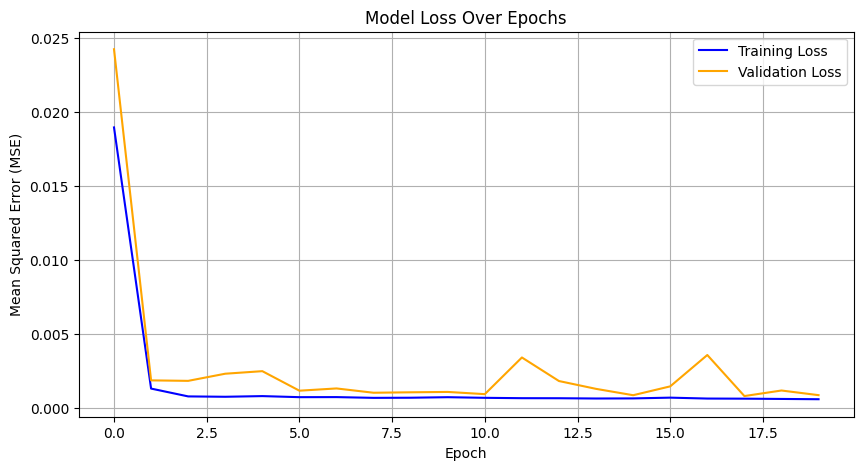

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
model.save("models/lstm_msft_model.h5")
print("✅ Model saved to models/lstm_msft_model.h5")


✅ Model saved to models/lstm_msft_model.h5


In [12]:
import numpy as np

# Get the last input sequence (shape: (60, 1))
last_60 = X_test[-1]  # shape (60, 1)
last_60 = np.expand_dims(last_60, axis=0)  # shape becomes (1, 60, 1)


In [13]:
predicted_scaled = model.predict(last_60)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step


In [14]:
# Reshape to (7, 1) for inverse scaling
predicted_scaled = predicted_scaled.reshape(-1, 1)

# Inverse transform using the same scaler from training
predicted_prices = scaler.inverse_transform(predicted_scaled)

# Flatten to 1D array
predicted_prices = predicted_prices.flatten()


In [15]:
import pandas as pd

# Load original data correctly from parent folder
df = pd.read_csv("E:\Python\Projects\stock-market-ai-analysis\data\MSFT_data.csv")
print(df.columns.tolist())



['date', 'open', 'high', 'low', 'close', 'volume', 'Name']


<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\rover\AppData\Local\Temp\ipykernel_13992\152399434.py:4: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("E:\Python\Projects\stock-market-ai-analysis\data\MSFT_data.csv")


In [16]:
# 🗓️ Replace 'date' with your actual column name from Step 1
df['date'] = pd.to_datetime(df['date'])

# 📅 Generate next 7 business days after the last known date
next_7_days = pd.date_range(start=df['date'].iloc[-1], periods=8, freq='B')[1:]

# 📈 Show predictions
print("📈 Next 7 Business Day Predictions (MSFT):")
for date, price in zip(next_7_days, predicted_prices):
    print(f"{date.date()} → ₹{price:.2f}")


📈 Next 7 Business Day Predictions (MSFT):
2018-02-08 → ₹89.90
2018-02-09 → ₹91.59
2018-02-12 → ₹88.90
2018-02-13 → ₹91.36
2018-02-14 → ₹90.83
2018-02-15 → ₹90.32
2018-02-16 → ₹89.26


C:\Users\rover\AppData\Local\Temp\ipykernel_13992\3678581990.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\rover\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


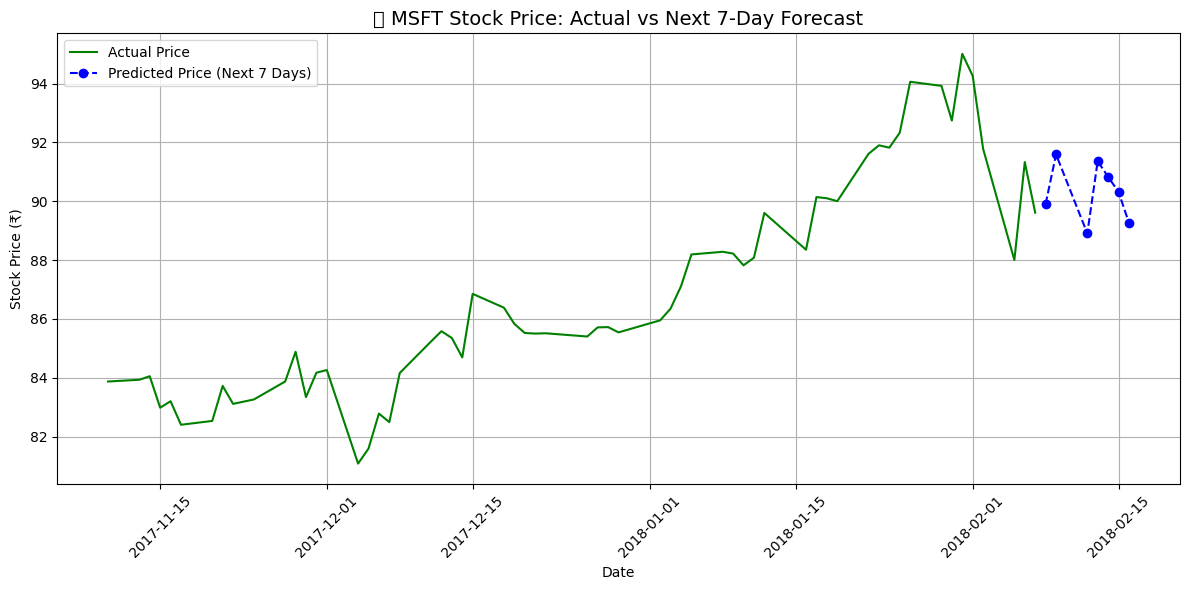

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load actual data and convert date
df = pd.read_csv("../data/MSFT_data.csv")  # Update path if needed
df['date'] = pd.to_datetime(df['date'])    # Replace 'date' with your actual column name

# Step 2: Get last N days of actual data to display
actual_dates = df['date'][-60:]
actual_prices = df['close'][-60:]          # Replace 'close' if your column is named differently

# Step 3: Plot actual and predicted
plt.figure(figsize=(12, 6))

# Actual data (green)
plt.plot(actual_dates, actual_prices, label='Actual Price', color='green')

# Predicted future data (blue)
plt.plot(next_7_days, predicted_prices, label='Predicted Price (Next 7 Days)', color='blue', marker='o', linestyle='--')

# Styling
plt.title('📈 MSFT Stock Price: Actual vs Next 7-Day Forecast', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
model.save("../models/lstm_msft_model.h5", include_optimizer=False)